In [ ]:
"""
Text Generation using GRU Model
-------------------------------------------
Steps:
1. Load or download dataset
2. Basic preprocessing & tokenization
3. Exploratory Data Analysis (EDA) & visualization
4. Prepare input sequences
5. Build & train GRU model
6. Generate text using beam search + temperature sampling
7. Save model and tokenizer
"""

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import re



In [ ]:
# Load the dataset
file_path = "input_text.txt"
with open(file_path, "r", encoding="utf-8") as file:
    text_data = file.read()

print("Sample text:\n", text_data[:5000], "\n")


Sample text:
 The Project Gutenberg eBook of Memories and Adventures
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Memories and Adventures

Author: Arthur Conan Doyle


CHAPTER I

EARLY RECOLLECTIONS

I was born on May 22, 1859, at Picardy Place, Edinburgh, so named
because in old days a colony of French Huguenots had settled there. At
the time of their coming it was a village outside the City walls, but
now it is at the end of Queen Street, abutting upon Leith Walk. When
last I visited it, it seemed to have degenerated, but at that time the
flats were of good repute.

My father was 

In [ ]:
# Basic Preprocessing
# Lowercase, remove unwanted characters
clean_text = re.sub(r"[^a-zA-Z0-9\s.,!?']", " ", text_data.lower())


In [ ]:
#Exploratory Data Analysis
tokens_raw = clean_text.split()
word_counts = Counter(tokens_raw)
print(f"Total words: {len(tokens_raw)}")
print(f"Unique words: {len(word_counts)}")
print("Most common words:", word_counts.most_common(10))

Total words: 16051
Unique words: 4138
Most common words: [('the', 936), ('of', 526), ('and', 513), ('a', 460), ('i', 415), ('to', 343), ('was', 312), ('in', 306), ('that', 249), ('it', 203)]


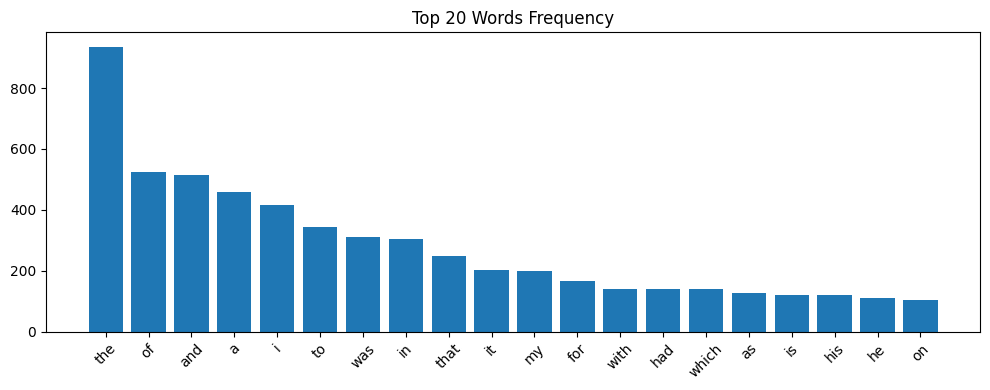

In [ ]:
# Ploting top 20 words frequency
plt.figure(figsize=(10, 4))
top_words = word_counts.most_common(20)
plt.bar([w for w, _ in top_words], [c for _, c in top_words])
plt.title("Top 20 Words Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([clean_text])
total_words = len(tokenizer.word_index) + 1
print("Vocabulary size:", total_words)

Vocabulary size: 3375


In [ ]:

# Create input sequences
input_sequences = []
for line in clean_text.split("\n"):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[: i + 1]
        input_sequences.append(n_gram_seq)

print("Total input sequences:", len(input_sequences))

Total input sequences: 14752


In [ ]:
# Pad sequences
max_sequence_len = 20
input_sequences = np.array(
    pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre")
)

X, labels = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print("Training samples:", X.shape, "Labels:", y.shape)

Training samples: (14752, 19) Labels: (14752, 3375)


In [ ]:
# Building GRU model
model = Sequential([
    Embedding(total_words, 100, input_length=max_sequence_len - 1),
    GRU(150, return_sequences=True),
    GRU(100),
    Dense(total_words, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:

# Training the model
history = model.fit(X, y, batch_size=128, epochs=100, verbose=1)
model.summary()

Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7171 - loss: 1.4585
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7200 - loss: 1.4391
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7344 - loss: 1.3723
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7418 - loss: 1.3373
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7538 - loss: 1.2834
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7574 - loss: 1.2459
Epoch 7/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7642 - loss: 1.2247
Epoch 8/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7719 - loss: 1.1768
Epoch 9/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7851 - loss: 1.1292
Epoch 10/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7890 - loss: 1.0958
Epoch 11/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7966 - loss: 1.0584
Epoch 12/100
116/116 ━━━━━━━━━━━━━━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 19, 100)        │       337,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 19, 150)        │       113,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 100)            │        75,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3375)           │       340,875 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,602,127 (9.93 MB)

 Trainable params: 867,375 (3.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,734,752 (6.62 MB)

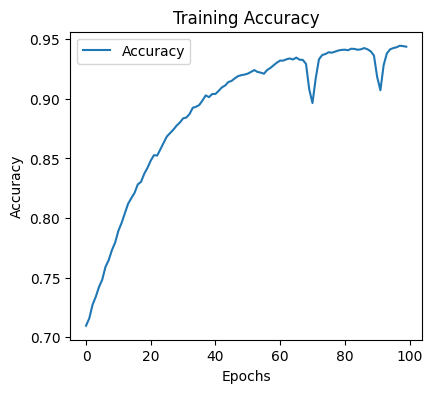

In [ ]:

# Ploting training accuracy in graph
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

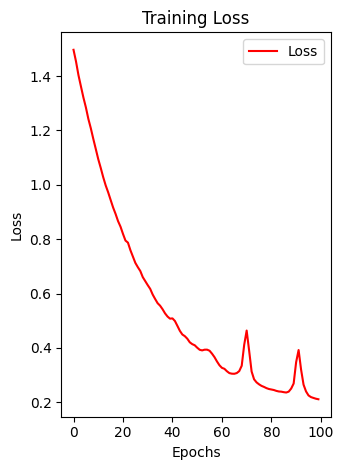

In [ ]:
# plotting training loss in graph
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Loss", color="red")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Text Generation Function
def generate_text_beam_search(seed_text, next_words, model, max_sequence_len,
                              beam_width=5, temperature=0.7):
    """
    Generate text using beam search + temperature sampling.
    """
    sequences = [[seed_text.split(), 1.0]]

    for _ in range(next_words):
        all_candidates = []

        for seq, score in sequences:
            token_list = tokenizer.texts_to_sequences([" ".join(seq)])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding="pre")

            predicted_probs = model.predict(token_list, verbose=0)[0]

            # Apply temperature scaling
            predicted_probs = np.log(predicted_probs + 1e-8) / temperature
            exp_preds = np.exp(predicted_probs)
            predicted_probs = exp_preds / np.sum(exp_preds)

            # Top-k words
            top_indices = np.argsort(predicted_probs)[-beam_width:]

            for idx in top_indices:
                next_word = tokenizer.index_word.get(idx, "")
                candidate_seq = seq + [next_word]
                candidate_score = score * predicted_probs[idx]
                all_candidates.append((candidate_seq, candidate_score))

        sequences = sorted(all_candidates, key=lambda x: x[1], reverse=True)[:beam_width]

    return " ".join(sequences[0][0])

In [ ]:
# text generation with sample data
seed = "I was born on"
generated_text = generate_text_beam_search(seed, 20, model, max_sequence_len,
                                           beam_width=5, temperature=0.8)
print("\nGenerated Text:\n", generated_text)


Generated Text:
 I was born on may 22 1859 at picardy place edinburgh so named a name of his house were still perhaps to the penal


In [ ]:
# Save Model & Tokenizer
model.save("text_generation_model.h5")
with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("\nModel and tokenizer saved successfully!")


Model and tokenizer saved successfully!
